In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
l = os.listdir('../Basketball Reference Stat Scraper/combined')
l.remove('.DS_Store')

In [3]:
df_list = []

for file in sorted(l):
    df_list.append(pd.read_csv(f'../Basketball Reference Stat Scraper/combined/{file}',index_col=0),)
df = pd.concat(df_list)
del(df_list)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,tm_ORtg,tm_DRtg,tm_NRtg,tm_Pace,tm_FTr,tm_3PAr,tm_TS%,tm_Year,tm_Team No Star,tm_Abbreviation
0,Kareem Abdul-Jabbar*,C,32.0,LAL,82.0,0.0,38.3,10.2,16.9,0.604,...,109.5,103.9,5.6,104.1,0.284,0.014,0.569,1980.0,Los Angeles Lakers,LAL
1,Marty Byrnes,SF,23.0,LAL,32.0,0.0,6.1,0.8,1.6,0.500,...,109.5,103.9,5.6,104.1,0.284,0.014,0.569,1980.0,Los Angeles Lakers,LAL
2,Jim Chones,C,30.0,LAL,82.0,0.0,29.2,4.5,9.3,0.489,...,109.5,103.9,5.6,104.1,0.284,0.014,0.569,1980.0,Los Angeles Lakers,LAL
3,Michael Cooper,SG,23.0,LAL,82.0,0.0,24.1,3.7,7.0,0.524,...,109.5,103.9,5.6,104.1,0.284,0.014,0.569,1980.0,Los Angeles Lakers,LAL
4,Spencer Haywood*,PF,30.0,LAL,76.0,0.0,20.3,3.8,7.8,0.487,...,109.5,103.9,5.6,104.1,0.284,0.014,0.569,1980.0,Los Angeles Lakers,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,Kevin Porter Jr.,PG,21.0,HOU,61.0,61.0,31.3,5.5,13.2,0.415,...,108.4,116.7,-8.3,100.9,0.284,0.448,0.565,2022.0,Houston Rockets,HOU
601,Trevelin Queen,SG,24.0,HOU,10.0,0.0,7.4,1.5,3.3,0.455,...,108.4,116.7,-8.3,100.9,0.284,0.448,0.565,2022.0,Houston Rockets,HOU
602,Alperen Şengün,C,19.0,HOU,72.0,13.0,20.7,3.5,7.3,0.474,...,108.4,116.7,-8.3,100.9,0.284,0.448,0.565,2022.0,Houston Rockets,HOU
603,Jae'Sean Tate,PF,26.0,HOU,78.0,77.0,26.4,4.7,9.3,0.498,...,108.4,116.7,-8.3,100.9,0.284,0.448,0.565,2022.0,Houston Rockets,HOU


In [4]:
df = df.drop(df[df.Player.isna()].index)
nash = df[df['Player'].str.contains('Steve Nash')].copy()

nash['Year'] = nash['Year'].astype(int)
nash = nash.sort_values('Year')

In [5]:
players = df.loc[(df.Year >= nash.Year.min()) & (df.Year <= nash.Year.max()),:]


In [9]:
def plot(df:pd.DataFrame,y:str,type:str='bar'):
    plt.figure(figsize=(10, 6), dpi=500,facecolor="#e0e0e0")

    sns.set_style('whitegrid')
    sns.set(rc={"figure.figsize":(8, 4),'figure.dpi':100})
    if type == 'bar':
        a = sns.barplot(df,x='Year',y=y)
    if type == 'line':
        a = sns.lineplot(df,x='Year',y=y)
    plt.tight_layout()
    return a

In [11]:
plot(nash.diff(),'PTS')

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<Axes: xlabel='Year', ylabel='PTS'>

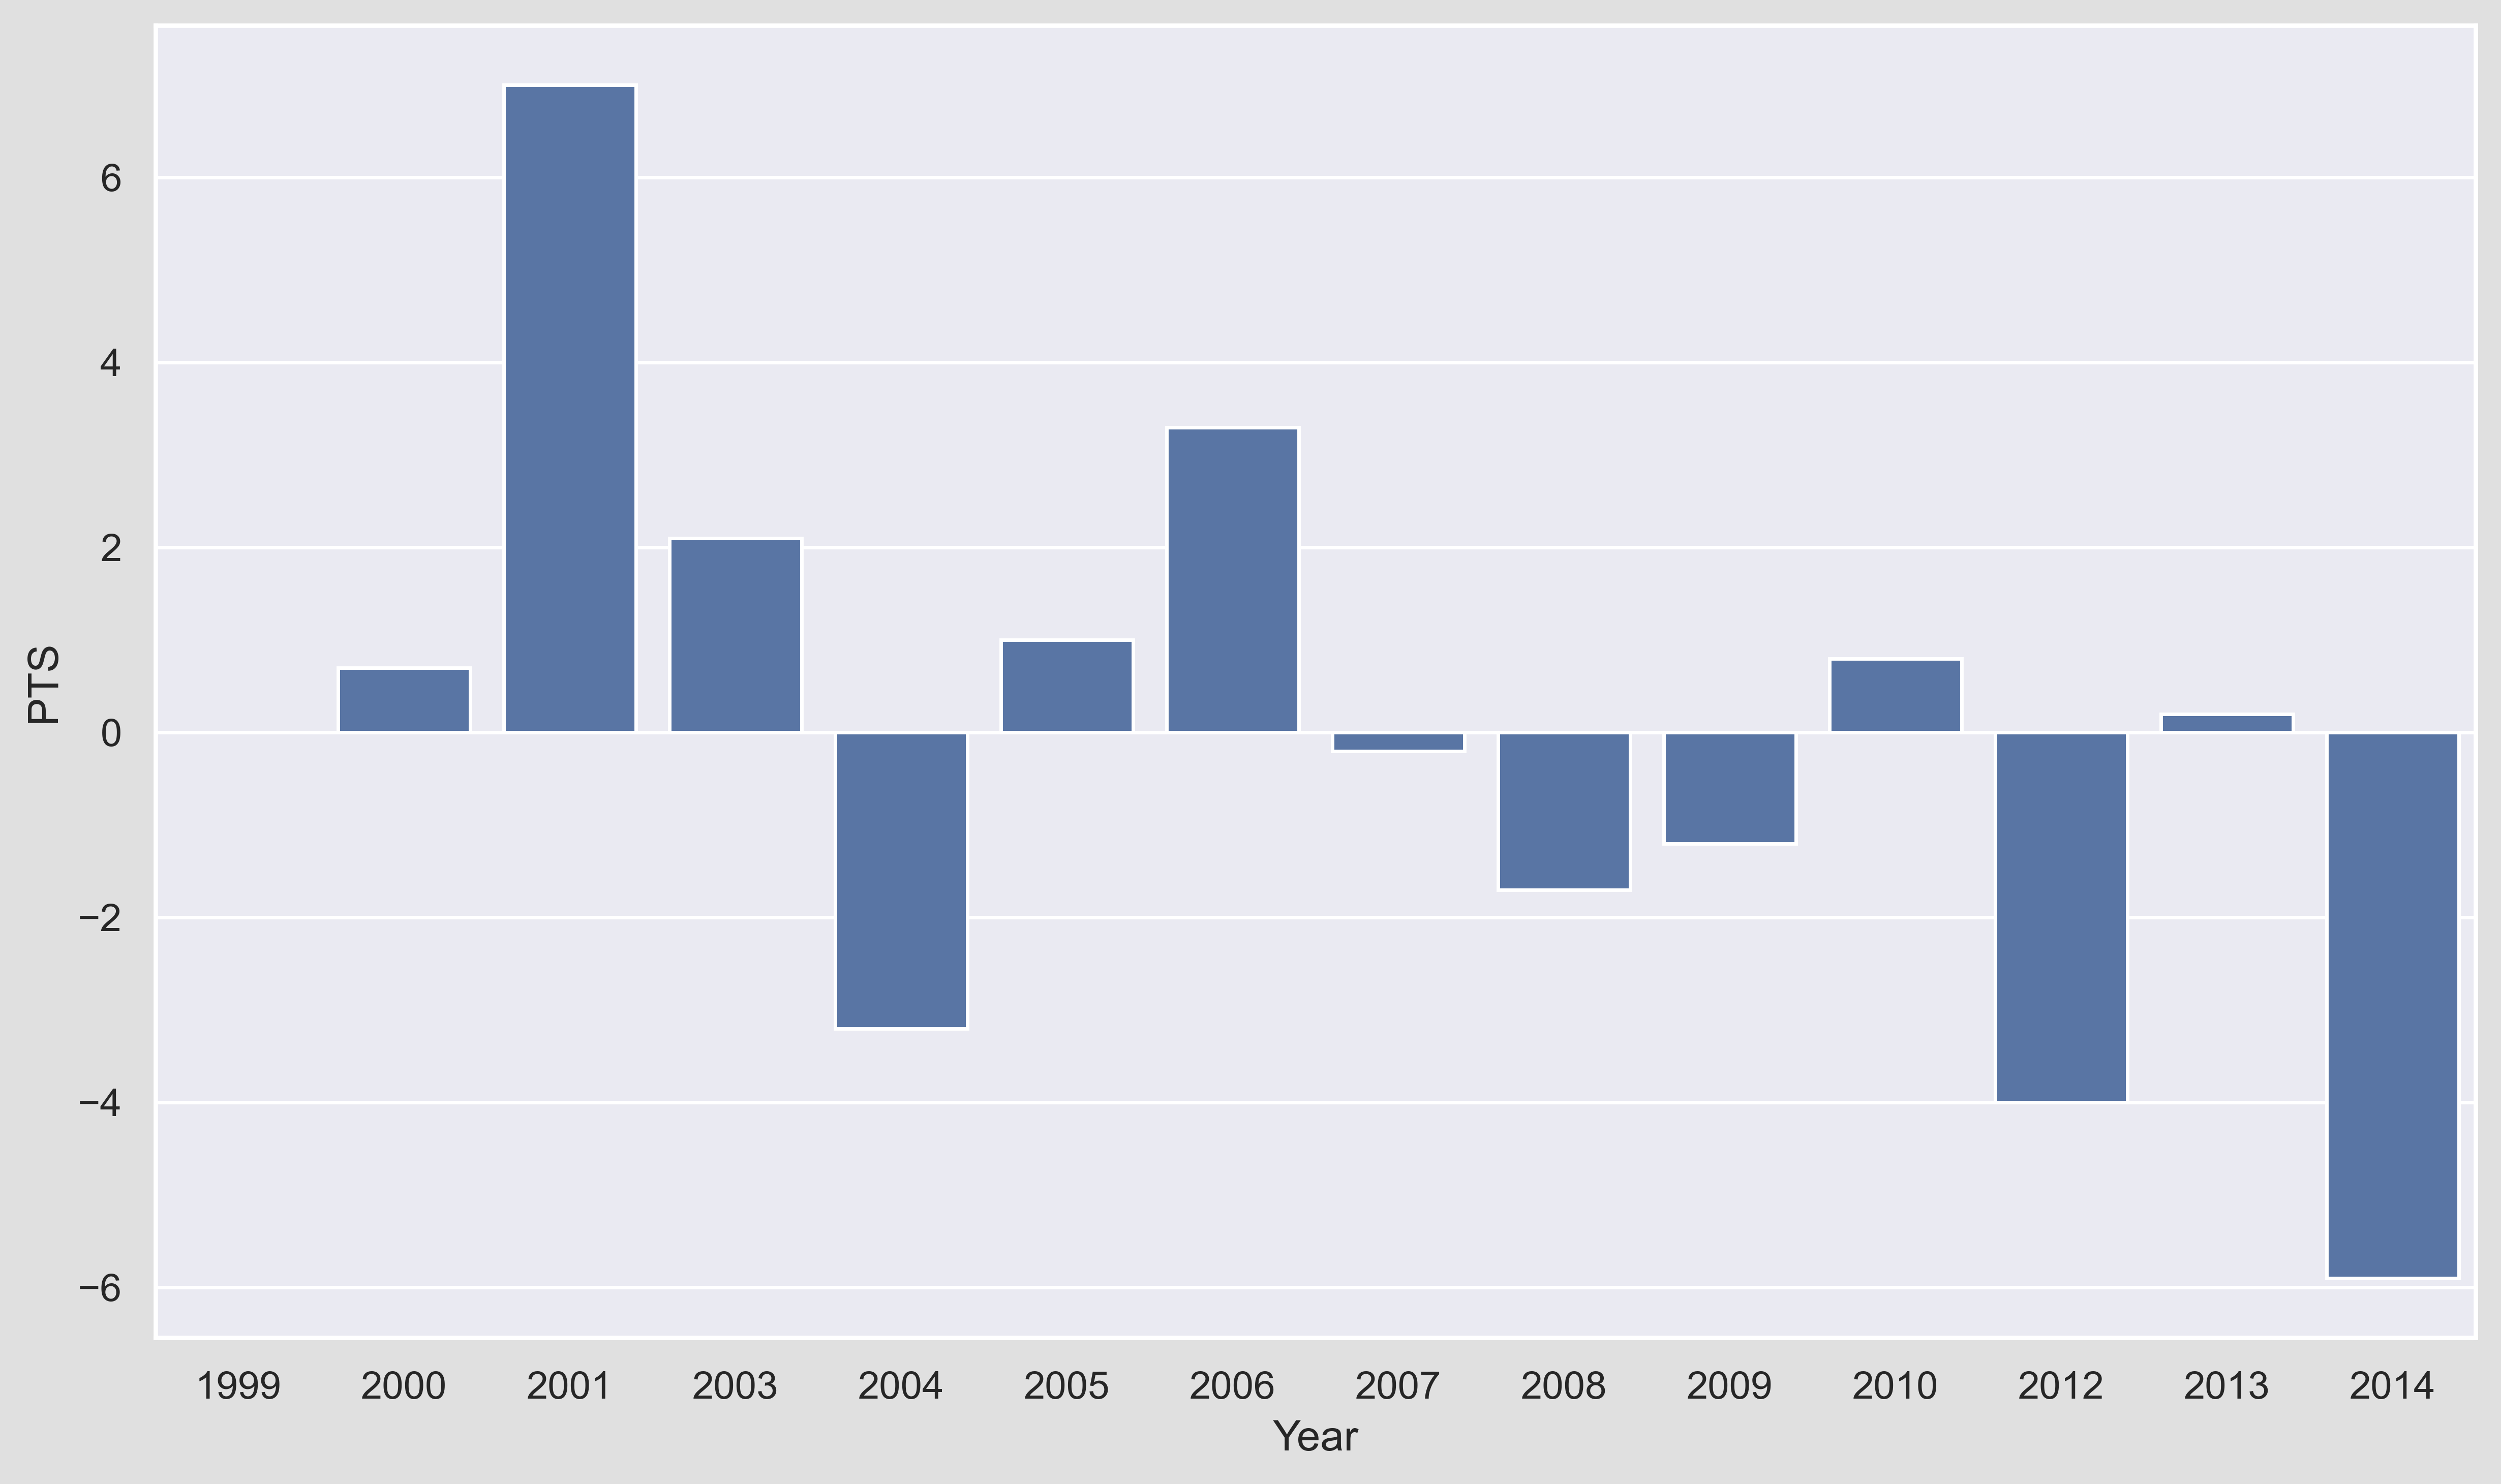

In [24]:
abc = nash[['PTS']].diff()

abc.loc[:,"Year"] = nash.Year
plot(abc,'PTS')

In [8]:
d = pd.read_csv('../Basketball Reference Stat Scraper/team_stats/all.csv',index_col=0)
avg = d[d['Team'].str.contains('League')]
teams = d.drop(avg.index)
teams.Team = teams.Team.str.strip('*')
teams.Year = teams.Year.astype(int)

In [159]:

teams = teams.loc[(teams.Year >= nash.Year.min()) & (teams.Year <= nash.Year.max()),:]

teams

,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Unnamed: 0,Year
0,San Antonio Spurs,50,241.5,32.6,81.2,0.402,3.4,11.2,0.304,29.2,...,7.12,104.0,95.0,9.0,88.6,0.371,0.137,0.523,0.0,1999
1,Utah Jazz,50,243.5,31.9,77.3,0.413,4.3,13.3,0.321,27.6,...,5.54,105.8,98.4,7.4,87.0,0.417,0.107,0.545,1.0,1999
2,Portland Trail Blazers,50,243.5,32.9,78.8,0.417,4.4,13.8,0.318,28.5,...,5.67,104.8,97.7,7.1,89.2,0.341,0.171,0.521,2.0,1999
3,Orlando Magic,50,241.0,34.2,77.1,0.443,4.6,13.3,0.345,29.6,...,3.11,100.3,97.4,2.9,88.8,0.318,0.171,0.498,3.0,1999
4,Miami Heat,50,240.5,31.3,76.1,0.411,4.2,12.1,0.348,27.1,...,5.11,104.7,98.9,5.8,84.8,0.354,0.226,0.540,4.0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,New Orleans Pelicans,82,242.1,37.3,80.1,0.465,8.0,22.3,0.357,29.3,...,-1.98,107.2,110.1,-2.9,92.2,0.286,0.193,0.537,20.0,2014
21,Cleveland Cavaliers,82,243.0,37.8,83.5,0.452,9.3,25.4,0.367,28.4,...,-3.86,104.2,107.7,-3.5,93.1,0.268,0.236,0.518,21.0,2014
24,Los Angeles Lakers,82,240.3,42.0,89.6,0.468,8.1,22.5,0.361,33.8,...,-5.33,104.2,110.6,-6.4,98.7,0.263,0.291,0.542,24.0,2014
26,Boston Celtics,82,240.6,37.8,81.4,0.465,6.6,18.9,0.347,31.2,...,-4.97,102.9,107.7,-4.8,93.3,0.248,0.251,0.517,26.0,2014


In [160]:
# Define custom style parameters
# Define a sleek and modern style
modern_style = {
    'figure.facecolor': 'white',         # Background color for the figure
    'axes.facecolor': '#EAEAF2',         # Light background color for the plot area
    'axes.grid': True,                  # No grid
    'axes.edgecolor': 'black',           # Color of the plot's border
    'axes.labelcolor': 'black',          # Color of the x and y labels
    'xtick.color': 'black',              # Color of the x tick labels
    'ytick.color': 'black',              # Color of the y tick labels
    'xtick.direction': 'in',            # Direction of x ticks
    'ytick.direction': 'out',            # Direction of y ticks
    'lines.linewidth': 4,                # Thickness of lines
    'lines.color': 'blue',               # Default color of lines
    'patch.edgecolor': 'black',          # Edge color for bars in barplot, etc.
    'text.color': 'black',               # General text color
    'font.size': 12,                     # General font size
    'axes.titlesize': 16,                # Title font size
    'axes.labelsize': 14,                # x and y labels font size
    'xtick.labelsize': 12,               # x tick label font size
    'ytick.labelsize': 12,               # y tick label font size
    'legend.frameon': False,             # No legend frame
    'legend.fontsize': 12                # Legend font size
}

# Apply custom style
sns.set_style('white', rc=modern_style)
modern_palette = sns.color_palette("husl", 3)  # 'husl' is a perceptually uniform palette
sns.set_palette(modern_palette)

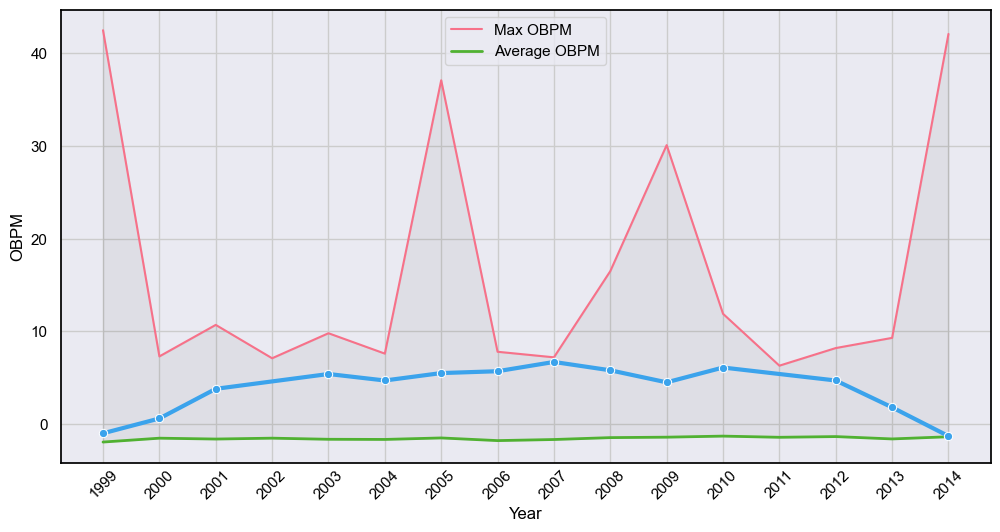

In [161]:

col = 'OBPM'

# Your existing filtered players dataset
filtered_players = players[(players['MP'] > 20) & (players['Pos'] == 'PG')]

# Calculate the max STAT value per year
max_per_year = players.groupby('Year')[col].max().reset_index()

# Calculate the average STAT value per year
avg_per_year = players.groupby('Year')[col].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Plotting the filtered players line plot
# sns.lineplot(data=filtered_players, x='Year', y='STAT', alpha=0.25, markers='o', legend=False, errorbar=None)


# Plotting the max STAT per year
sns.lineplot(data=max_per_year, x='Year', y=col, label=f'Max {col}')

# Plotting the average STAT per year
sns.lineplot(data=avg_per_year, x='Year', y=col, label=f'Average {col}', linewidth=2)

# Fill the area between the average and max STAT lines
plt.fill_between(x=max_per_year['Year'], y1=max_per_year[col], y2=avg_per_year[col], color='black', alpha=0.05)
sns.lineplot(nash,x='Year',y=col,linewidth=3,marker='o')
# Set x-ticks rotation and show plot
plt.xticks(range(nash.Year.min(),nash.Year.max()+1),rotation=45)

plt.show()


In [162]:
col = 'ORtg'

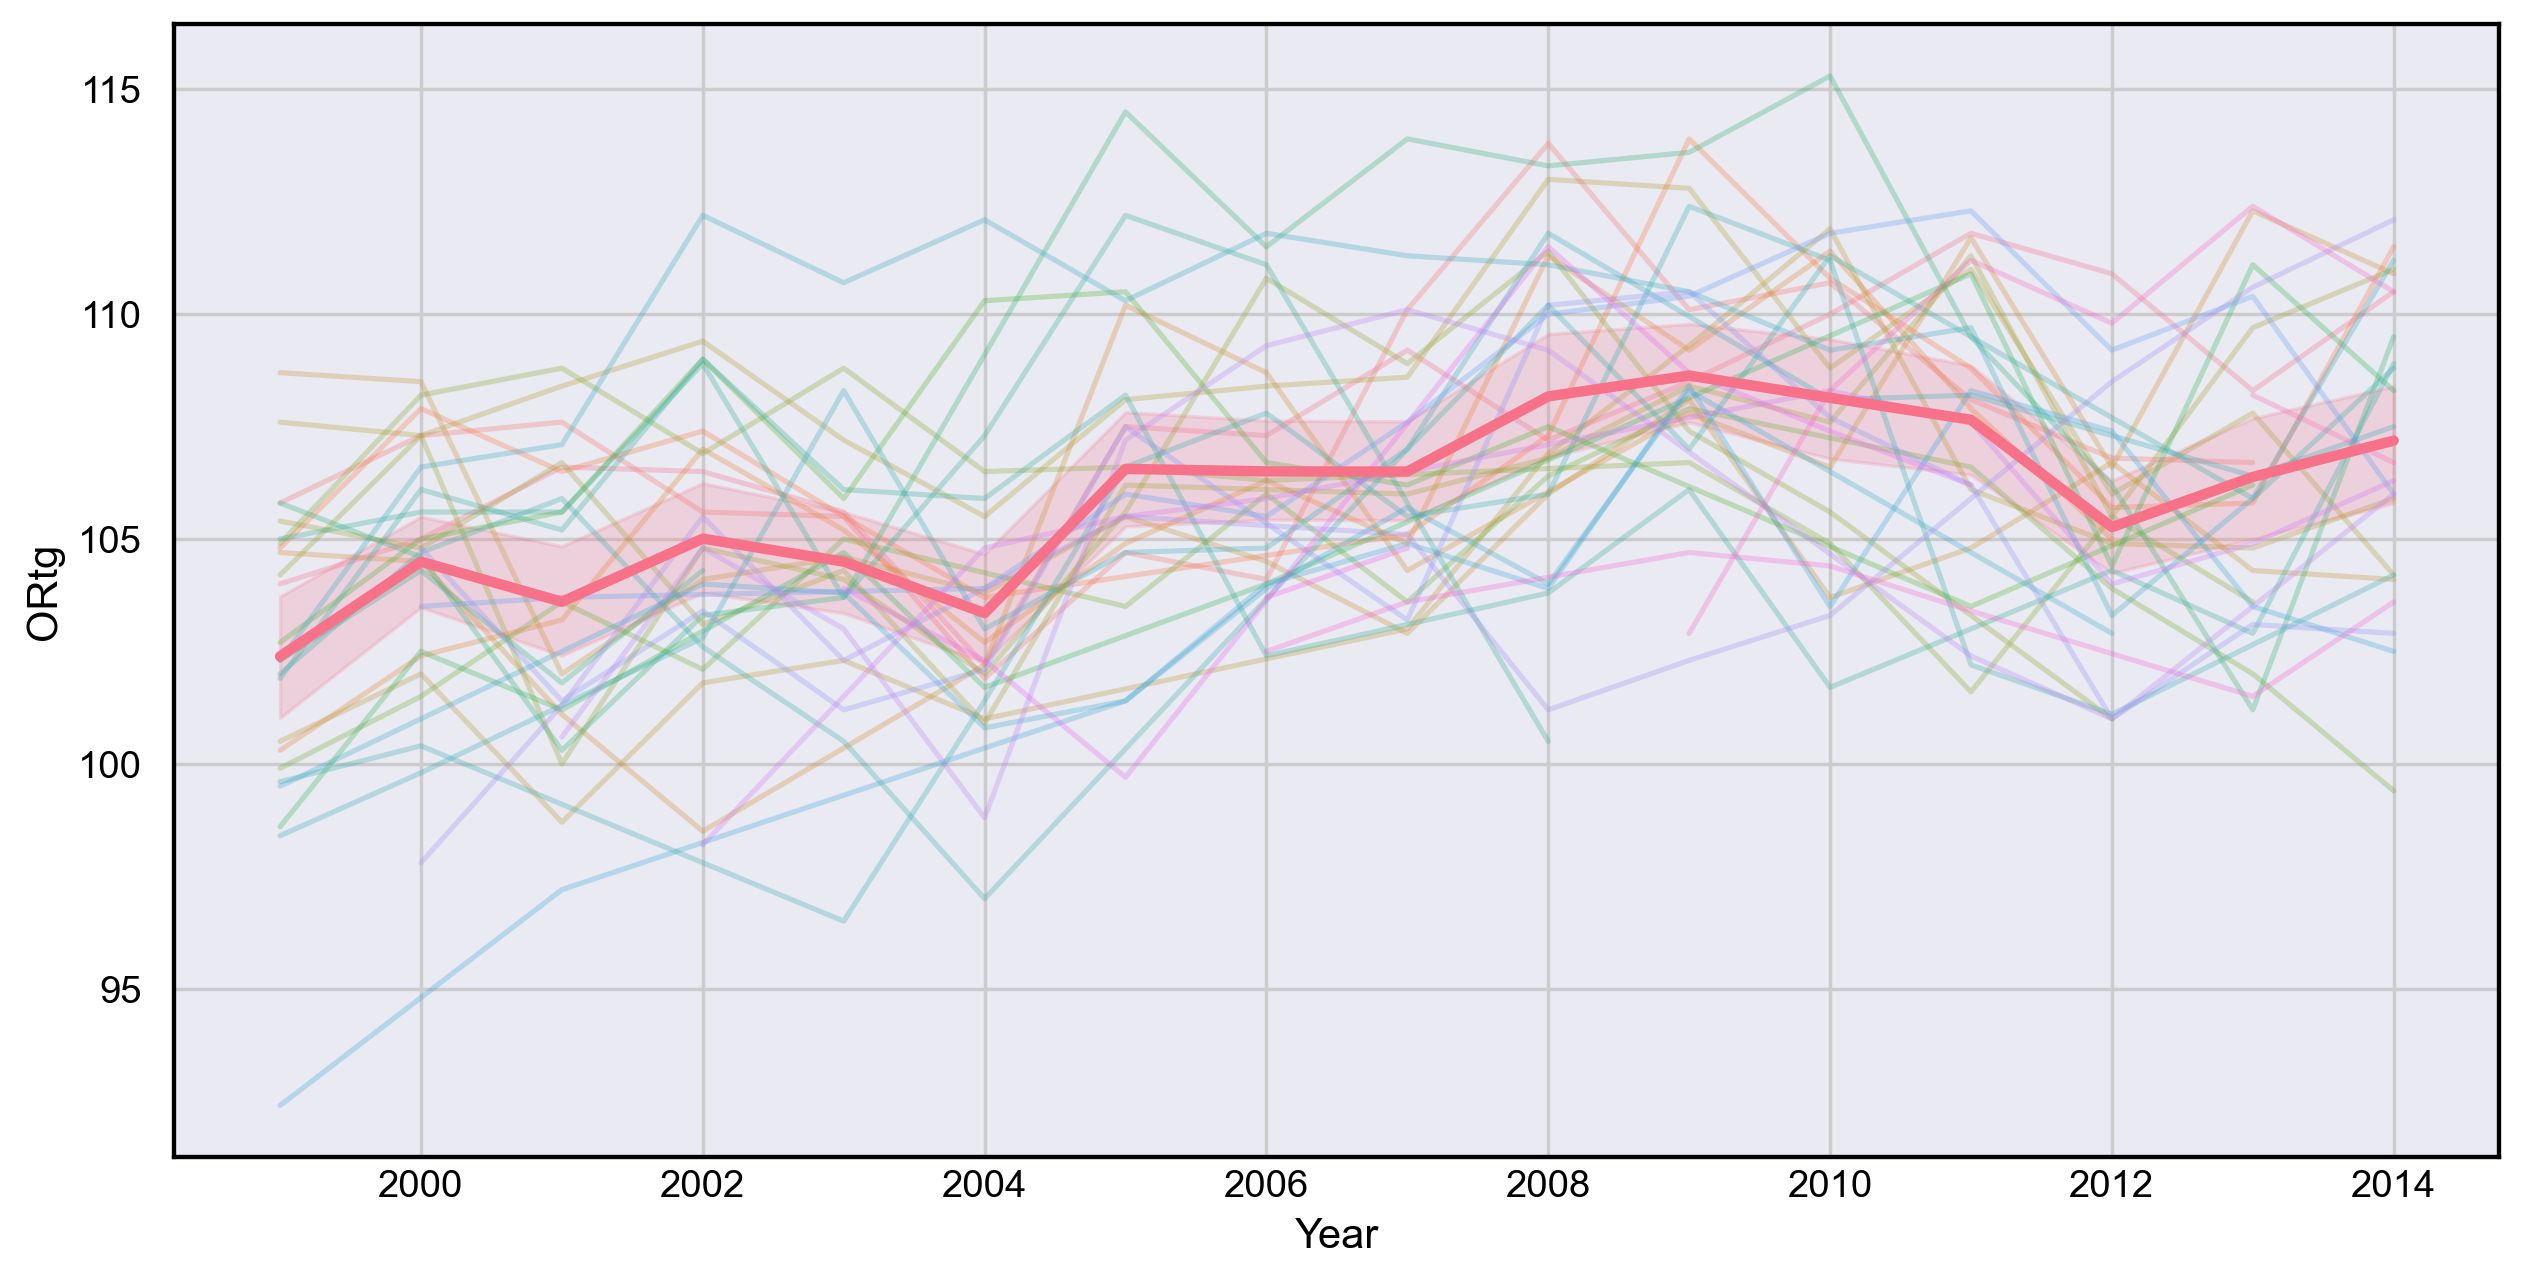

In [163]:
plt.figure(figsize=(12,6),dpi=250)

sns.lineplot(teams,x='Year',y=col,hue='Team',errorbar=('ci',False),legend=False,alpha=0.3)
sns.lineplot(teams,x='Year',y=col,legend=False,linewidth=3)
plt.show()

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index if necessary
teams.reset_index(drop=True, inplace=True)

# Calculate the year-over-year difference for each team
team_diff = teams.groupby('Team').diff()

# Concatenate the differences with the original DataFrame
teams = pd.concat([teams, team_diff.add_suffix('_yoy')], axis=1)



posx and posy should be finite values
posx and posy should be finite values


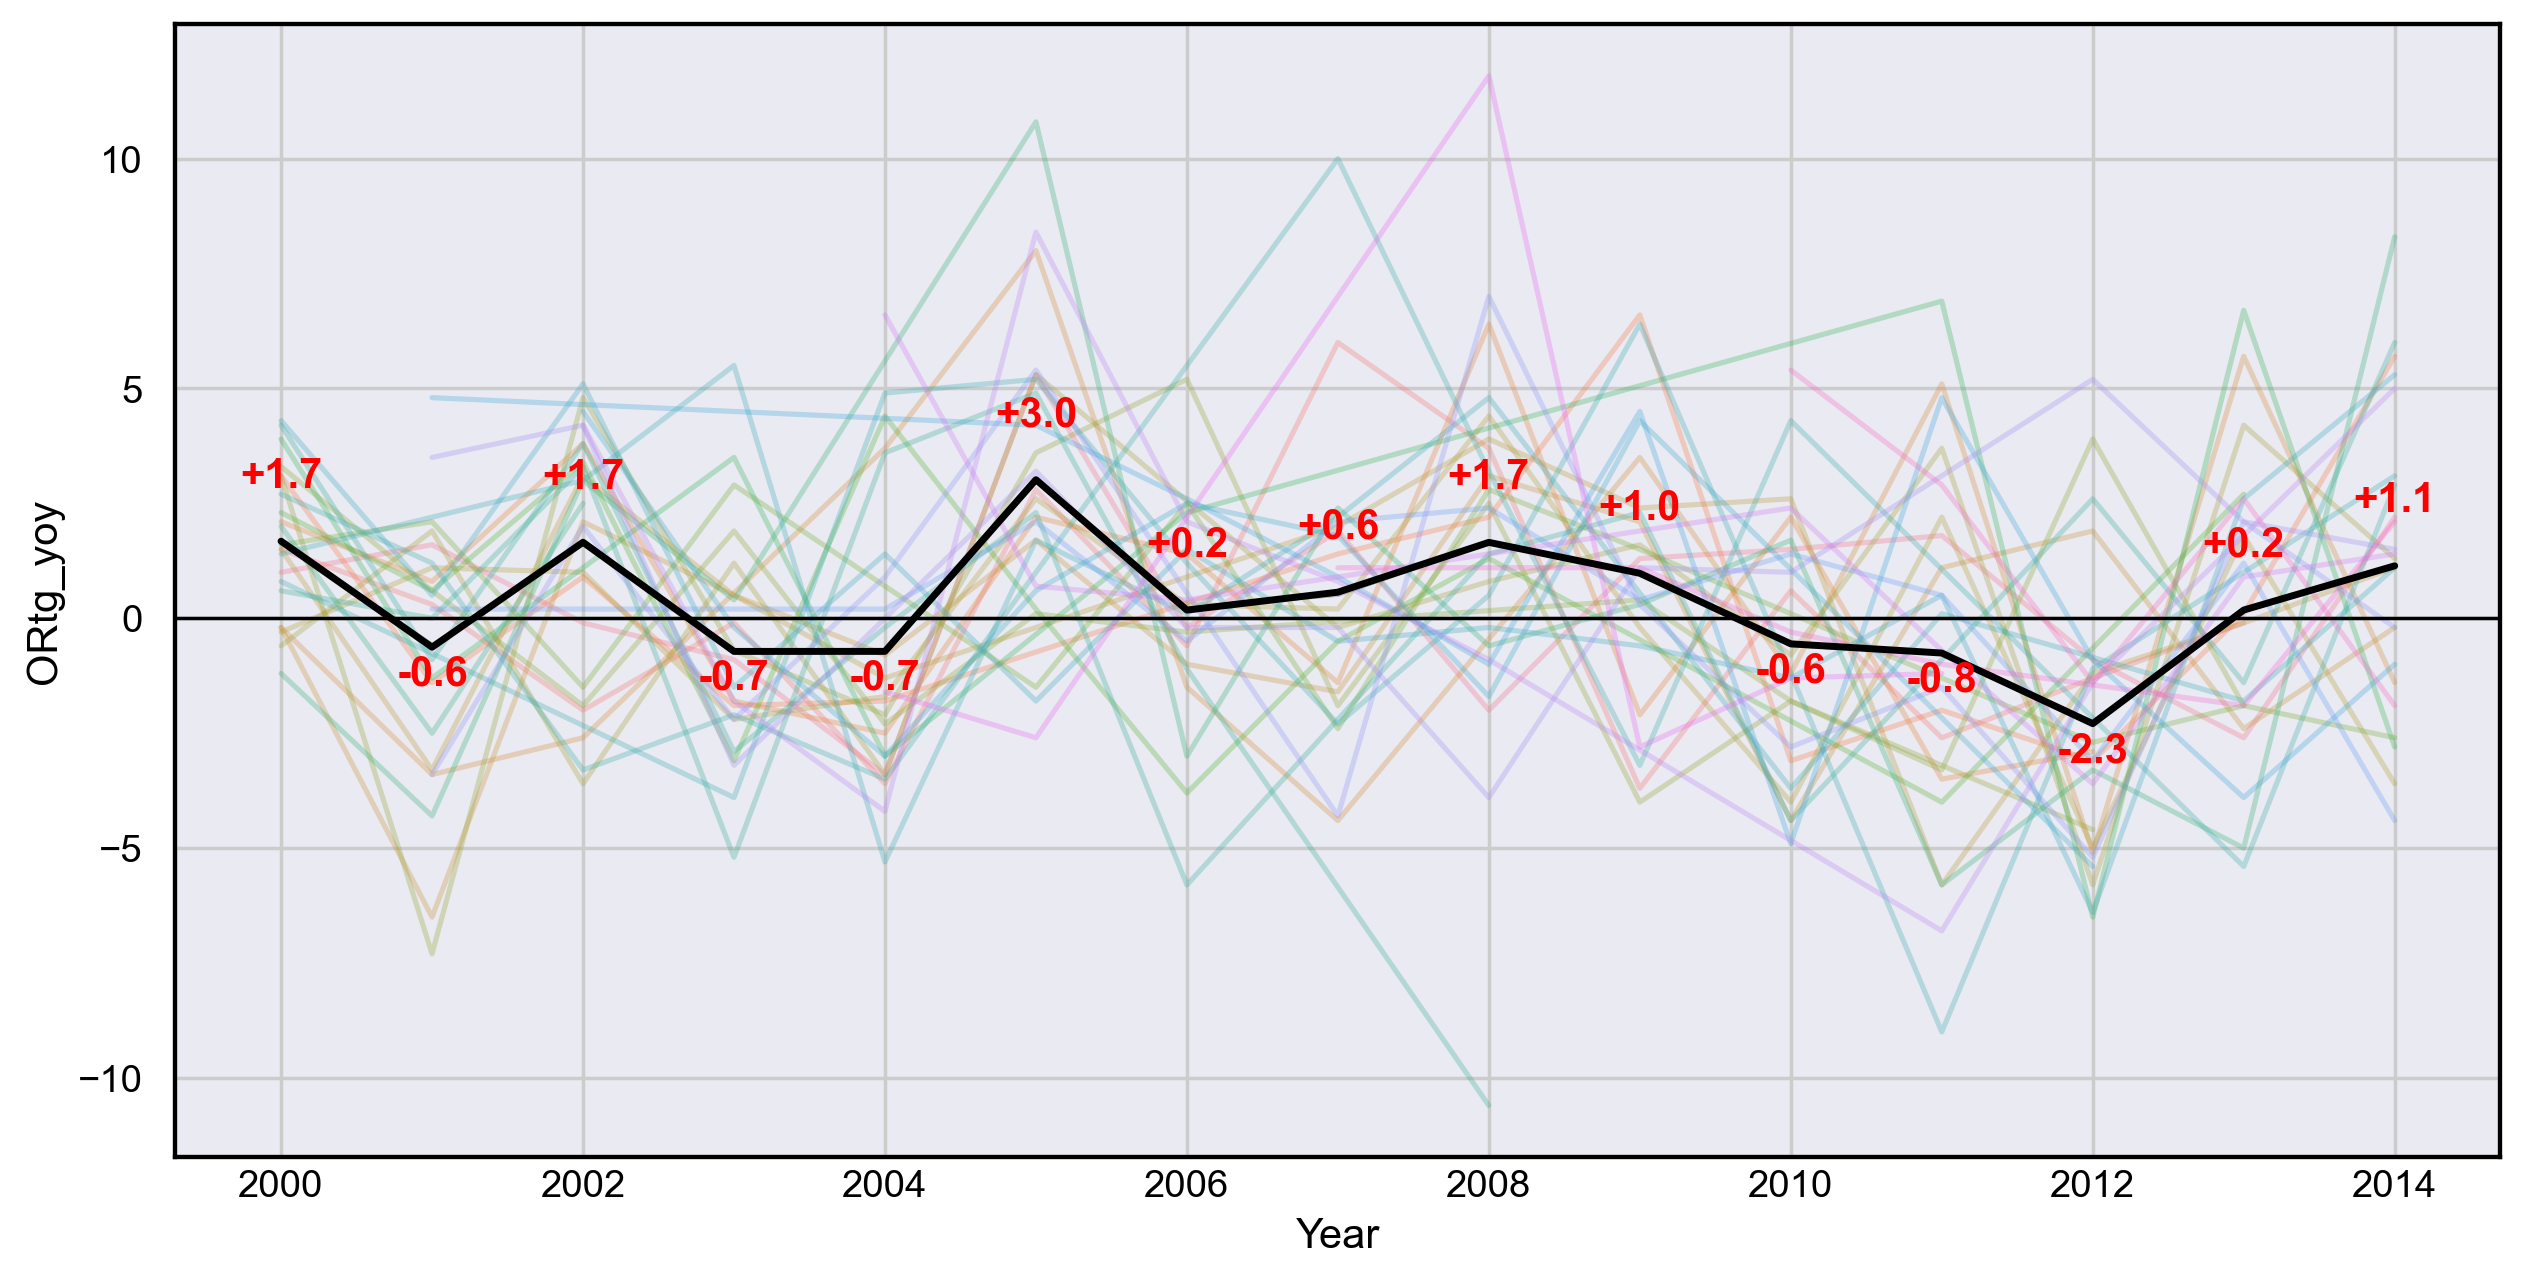

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6), dpi=250)

# Plotting all teams with a light color and alpha
sns.lineplot(data=teams, x='Year', y=f'{col}_yoy', hue='Team', legend=False, alpha=0.3)

# Plotting the average (or main line) with a thicker line
avg_line = sns.lineplot(data=teams, x='Year', y=f'{col}_yoy', color='black', legend=False, linewidth=2,errorbar=('ci',False))

# Adding a horizontal line at y=0
plt.axhline(0, color='black', linewidth=1)

# Adding value over each point for the average line
years = teams['Year'].unique()
for year in years:
    value = teams[teams['Year'] == year][f'{col}_yoy'].mean()
    sign = '+' if value >= 0 else ''

    # Adjust the label position based on the sign of the value
    if value > 0:
        label_y_pos = value + 1  # Higher for positive values
    else:
        label_y_pos = value - 1  # Lower for negative values

    plt.text(year, label_y_pos, f'{sign}{value:.1f}', color='red', ha='center', va='bottom', fontweight='bold')



# plt.xticks(range(1980,2026,5))

plt.show()

In [166]:
d = pd.read_csv('../Basketball Reference Stat Scraper/team_stats/all.csv',index_col=0)
avg = d[d['Team'].str.contains('League')]
teams = d.drop(avg.index)
teams.Team = teams.Team.str.strip('*')
teams.Year = teams.Year.astype(int)

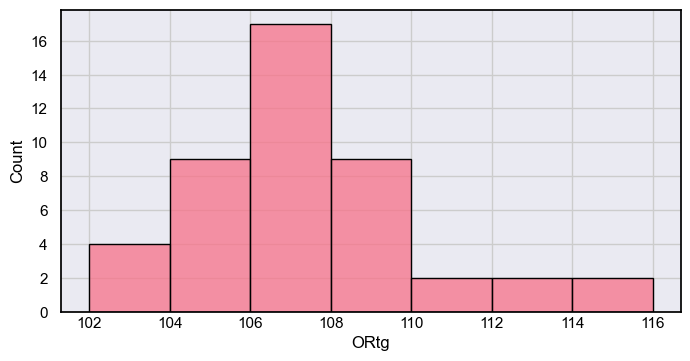

In [167]:
import math

sns.histplot(avg,x='ORtg',bins=range(math.floor(avg['ORtg'].min()),math.ceil(avg['ORtg'].max())+1,2))
plt.show()

In [168]:

# Reset index if necessary
avg.reset_index(drop=True, inplace=True)

# Calculate the year-over-year difference for each team
avg_diff = avg.drop(columns='Team').diff()

# Concatenate the differences with the original DataFrame
avg = pd.concat([avg, avg_diff.add_suffix('_yoy')], axis=1)



In [187]:
avg.Year = avg.Year.astype(int)

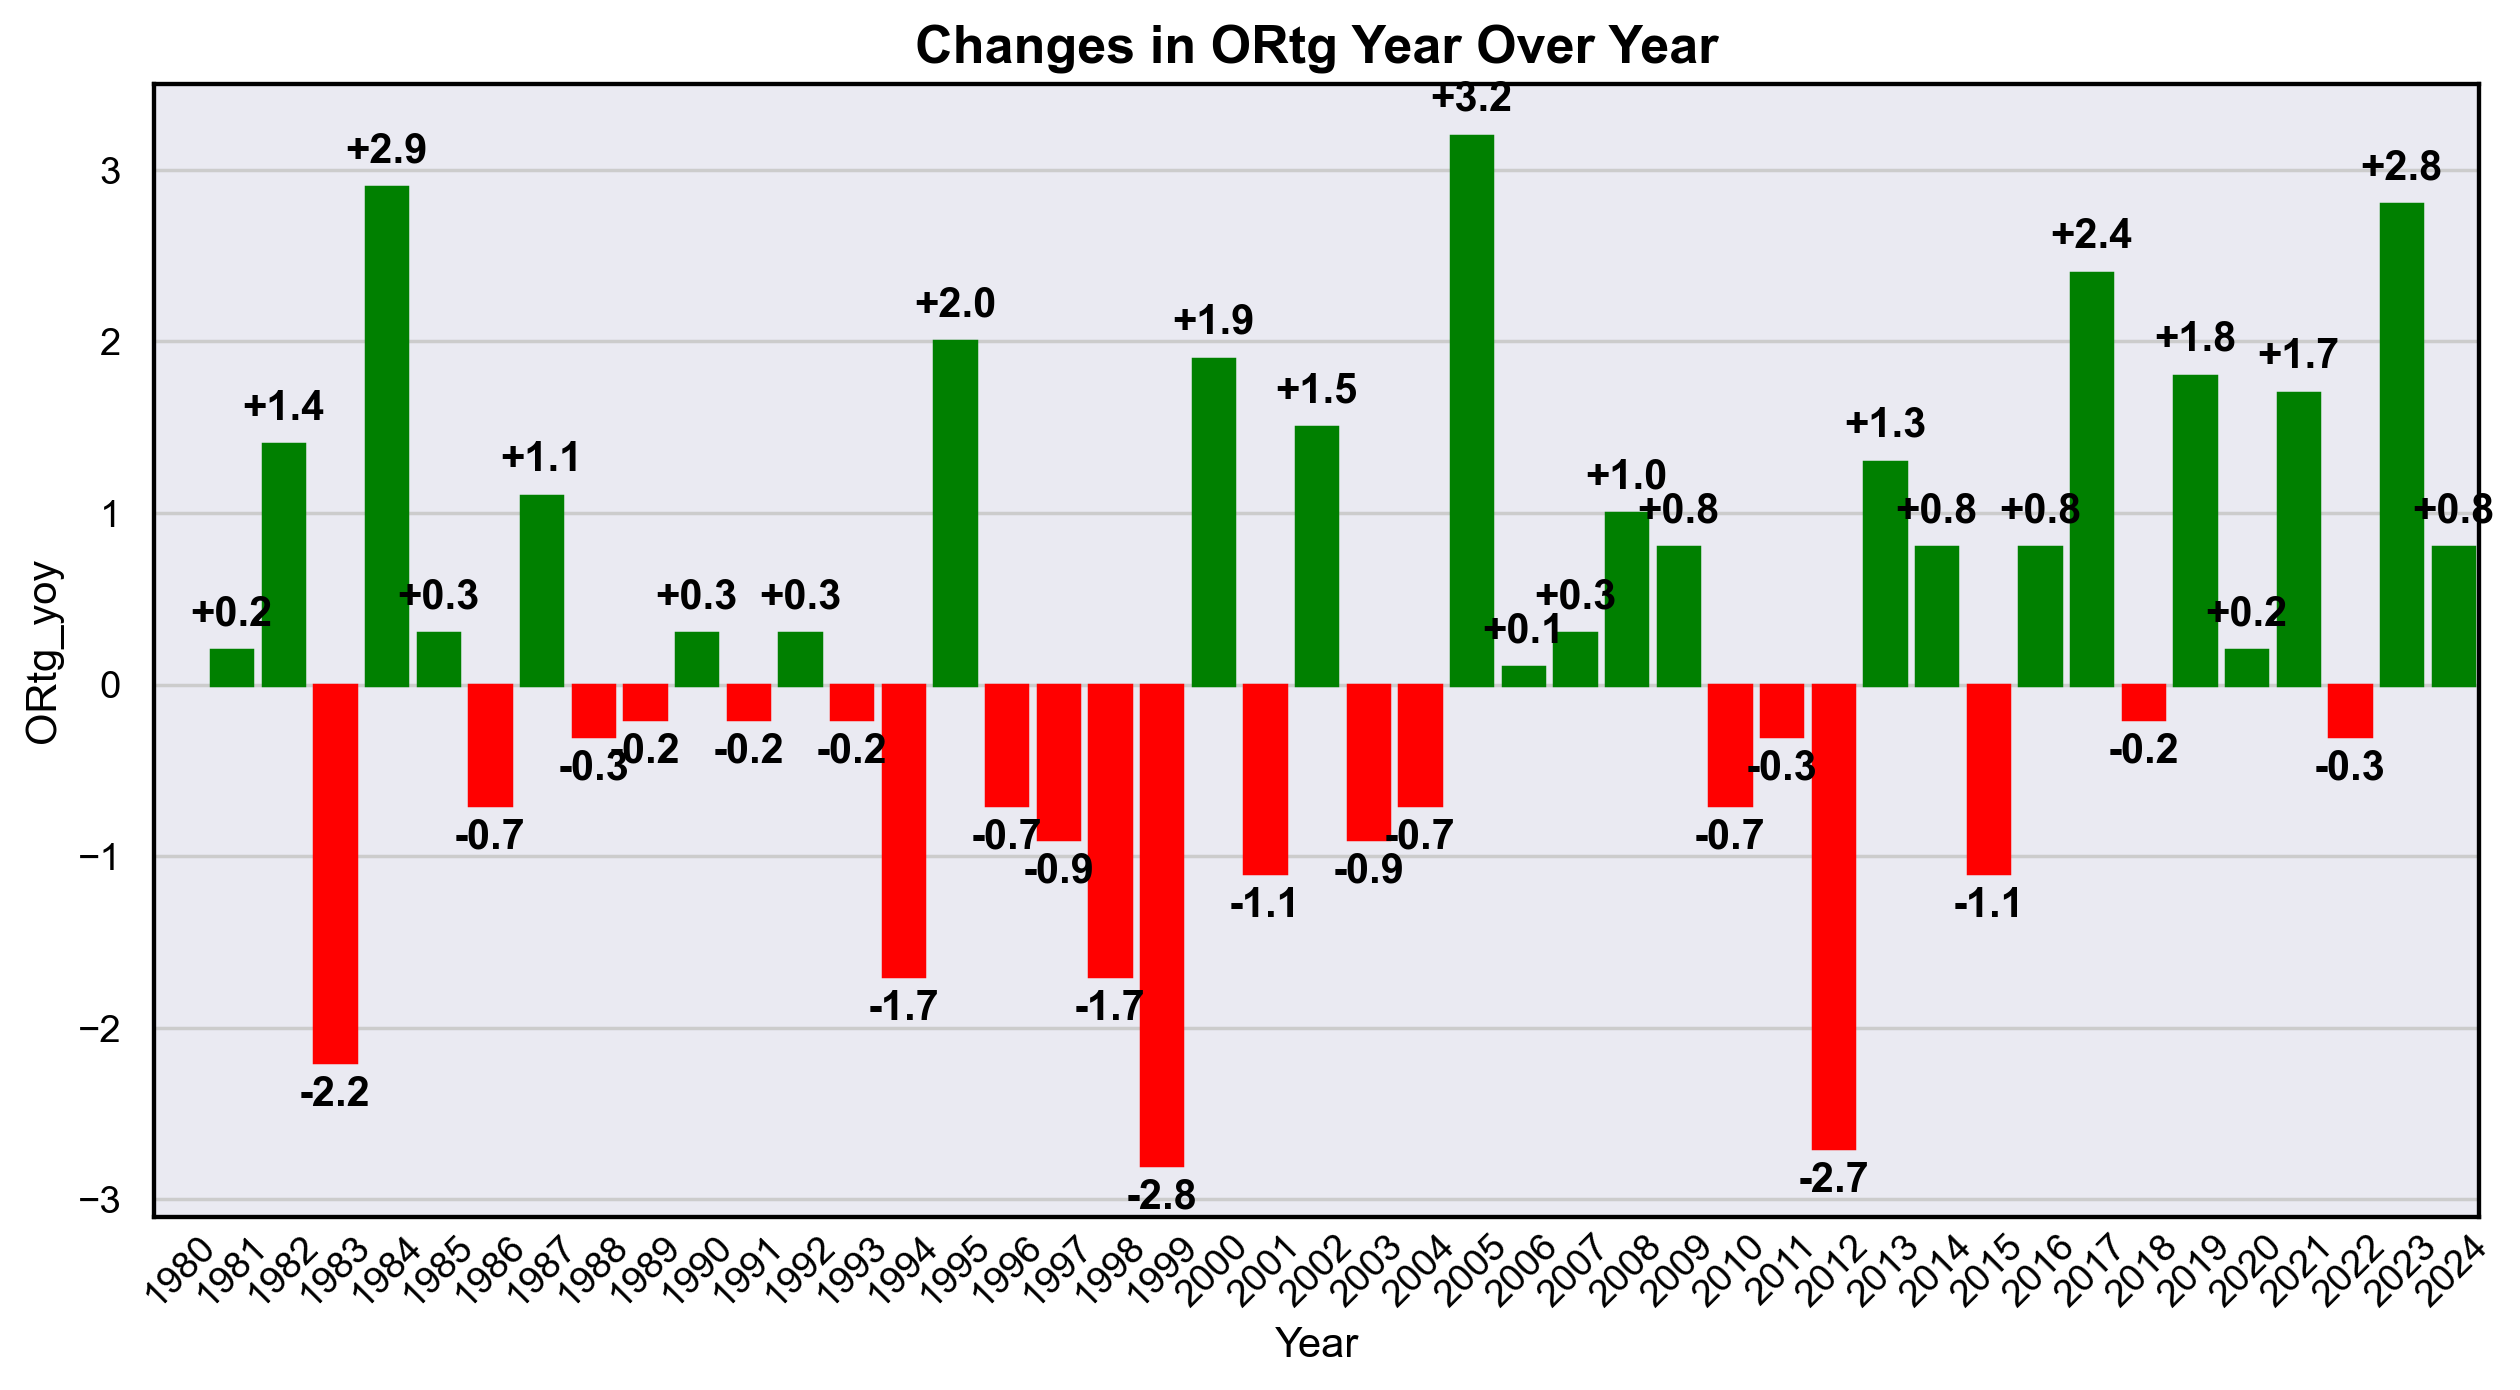

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'ORtg'
plt.figure(figsize=(12, 6), dpi=250)

# Assuming 'avg' is a DataFrame that contains the average values of 'ORtg_yoy' for each year
# Ensure 'avg' is sorted by year if it's not already
avg.sort_values(by='Year', inplace=True)

# Plotting the barplot without specifying colors
ax = sns.barplot(data=avg, x='Year', y=f'{col}_yoy', color='lightgray')

# Adding labels and setting bar colors in the same loop
for p in ax.patches:
    height = p.get_height()

    # Set color based on the value
    bar_color = 'green' if height >= 0 else 'red'
    p.set_color(bar_color)

    # Choose position above the bar for positive and below for negative values
    label_pos = height + (0.1 if height >= 0 else -0.3)

    # Formatting the label with '+' for positive values
    label = f'+{height:.1f}' if height >= 0 else f'{height:.1f}'
    ax.text(p.get_x() + p.get_width() / 2., label_pos,
            label, ha="center", va='bottom', color='black', fontweight='bold')

plt.xticks(rotation=45)
plt.title(f'Changes in {col} Year Over Year', fontweight='bold', fontsize=15)

plt.show()


In [224]:
avg.columns

Index(['Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'Age', 'W', 'L', 'MOV', 'SOS', 'SRS', 'ORtg',
       'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'Unnamed: 0', 'Year',
       'G_yoy', 'MP_yoy', 'FG_yoy', 'FGA_yoy', 'FG%_yoy', '3P_yoy', '3PA_yoy',
       '3P%_yoy', '2P_yoy', '2PA_yoy', '2P%_yoy', 'FT_yoy', 'FTA_yoy',
       'FT%_yoy', 'ORB_yoy', 'DRB_yoy', 'TRB_yoy', 'AST_yoy', 'STL_yoy',
       'BLK_yoy', 'TOV_yoy', 'PF_yoy', 'PTS_yoy', 'Age_yoy', 'W_yoy', 'L_yoy',
       'MOV_yoy', 'SOS_yoy', 'SRS_yoy', 'ORtg_yoy', 'DRtg_yoy', 'NRtg_yoy',
       'Pace_yoy', 'FTr_yoy', '3PAr_yoy', 'TS%_yoy', 'Unnamed: 0_yoy',
       'Year_yoy', '3yr_Rolling_Avg'],
      dtype='object')

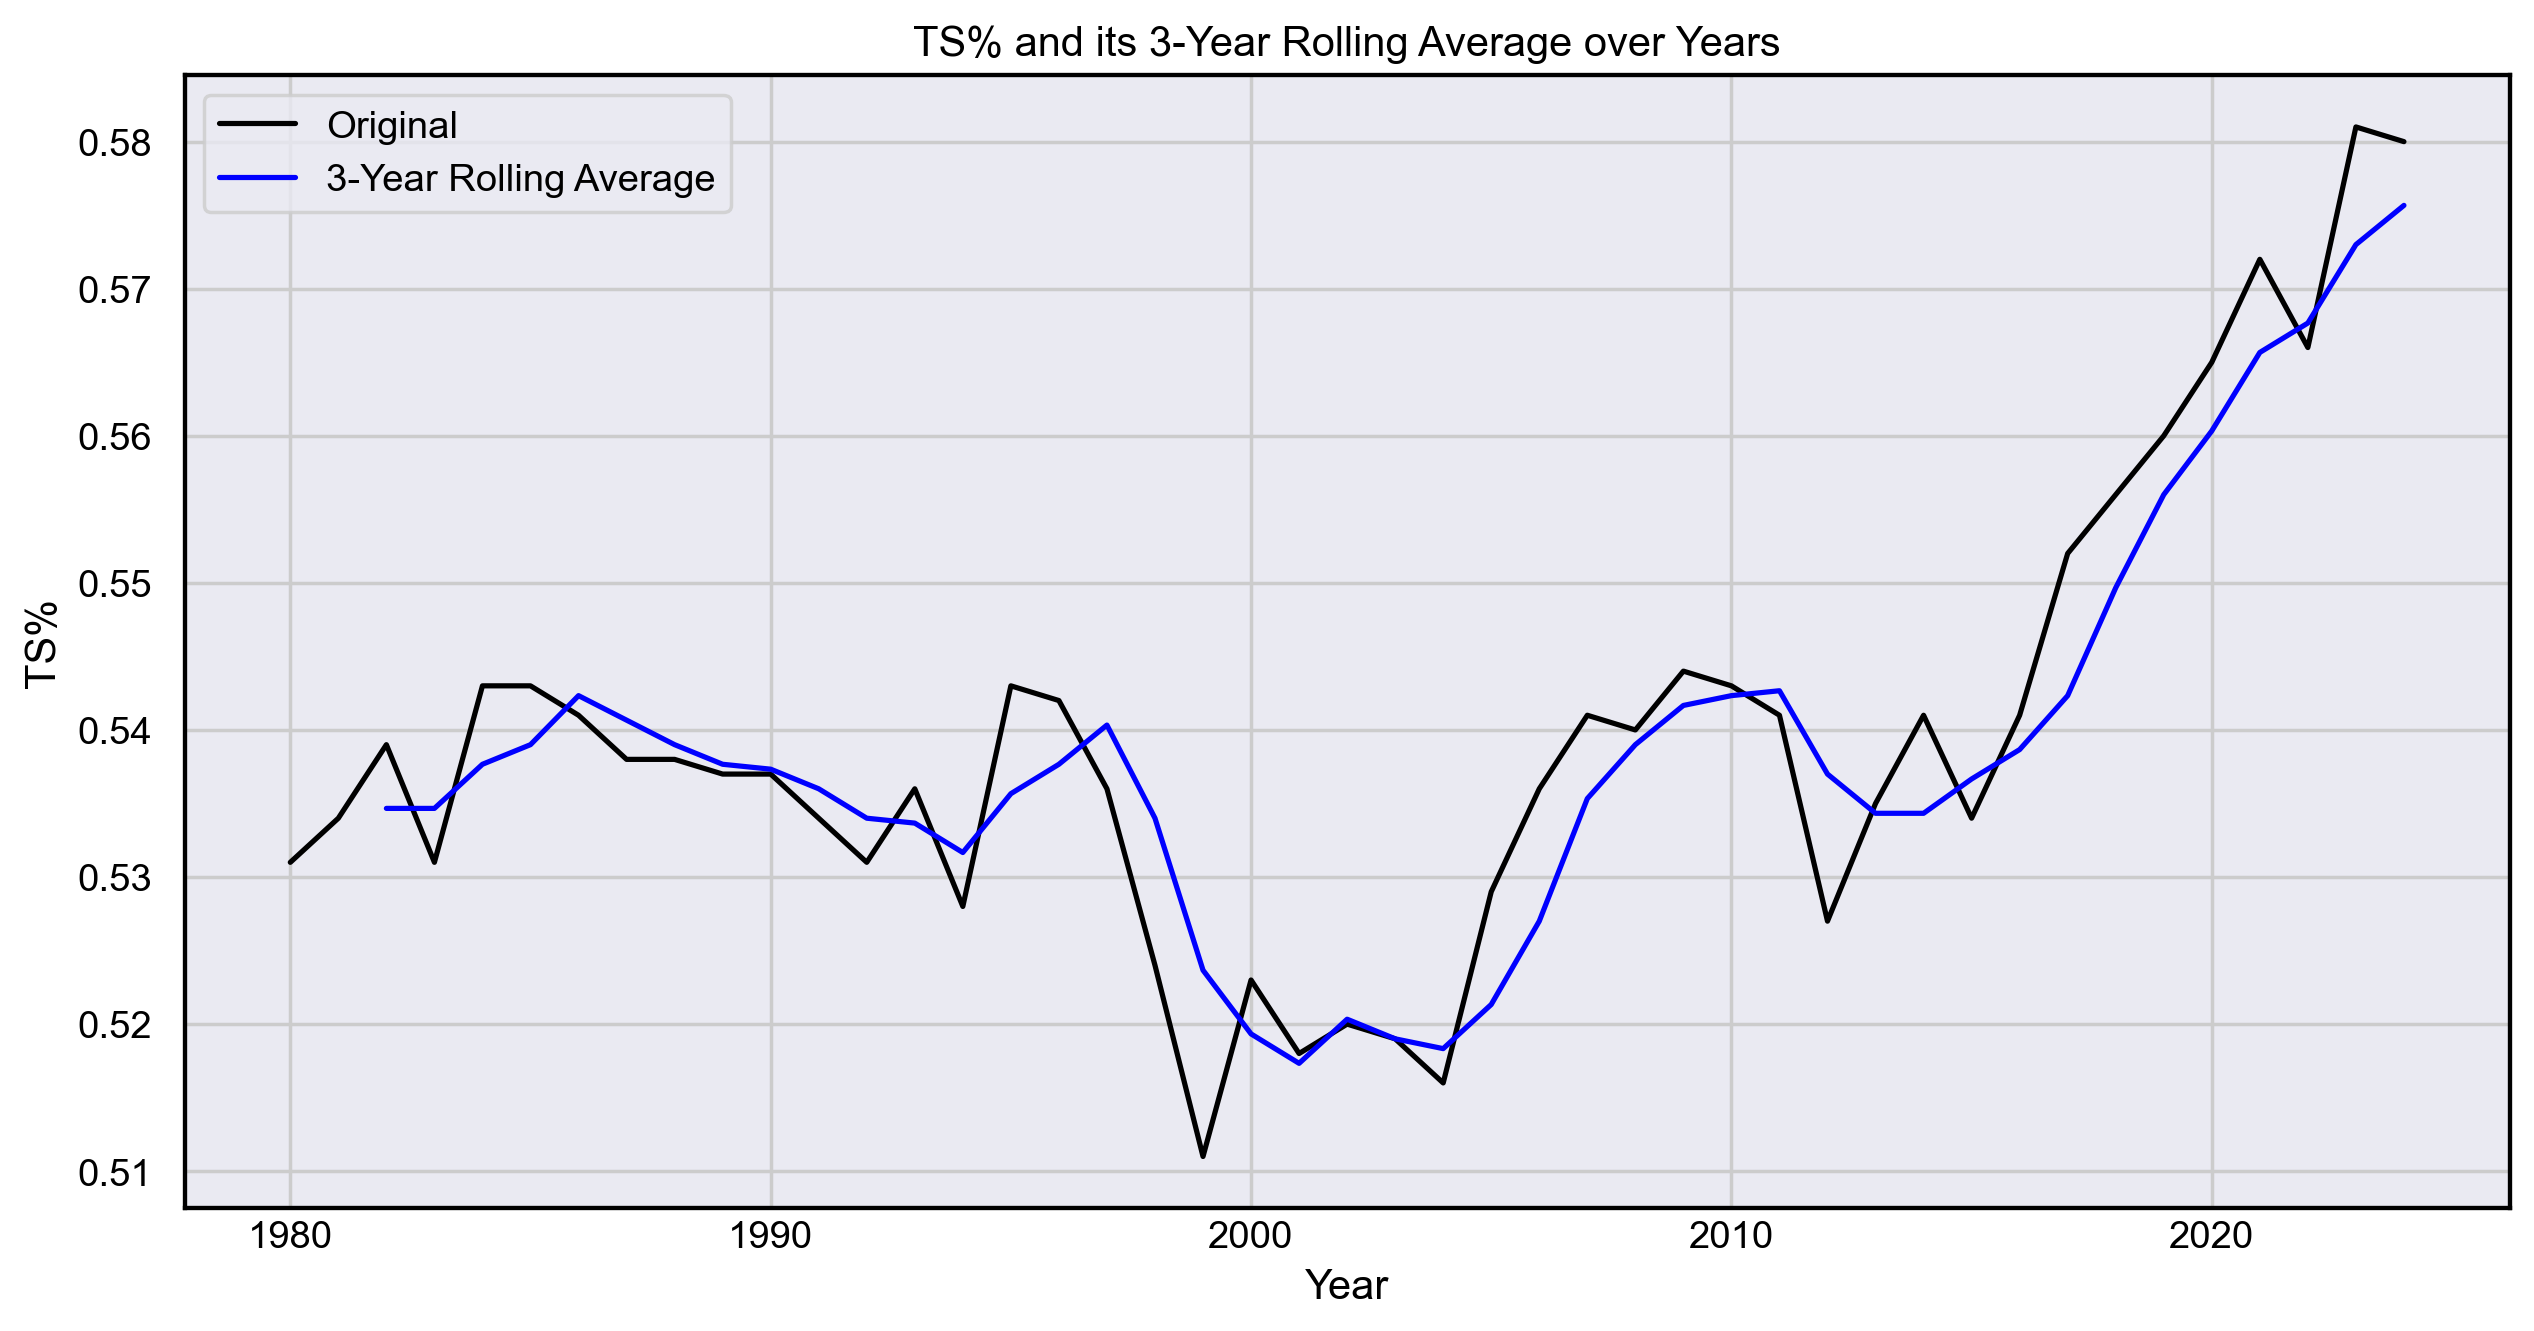

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avg is your DataFrame
col = 'TS%'

# Ensure 'avg' is sorted by year
avg.sort_values(by='Year', inplace=True)

# Calculate the rolling 3-year average
avg['3yr_Rolling_Avg'] = avg[col].rolling(window=3).mean()

# Now, let's plot both the original and the rolling average
plt.figure(figsize=(12, 6), dpi=250)

# Original data plot
sns.lineplot(data=avg, x='Year', y=col, color='black', label='Original')

# Rolling average plot
sns.lineplot(data=avg, x='Year', y='3yr_Rolling_Avg', color='blue', label='3-Year Rolling Average')

# Adding title and labels
plt.title(f'{col} and its 3-Year Rolling Average over Years')
plt.xlabel('Year')
plt.ylabel(col)

# Display the plot
plt.legend()
plt.show()


<Axes: xlabel='Year', ylabel='TS%_yoy'>

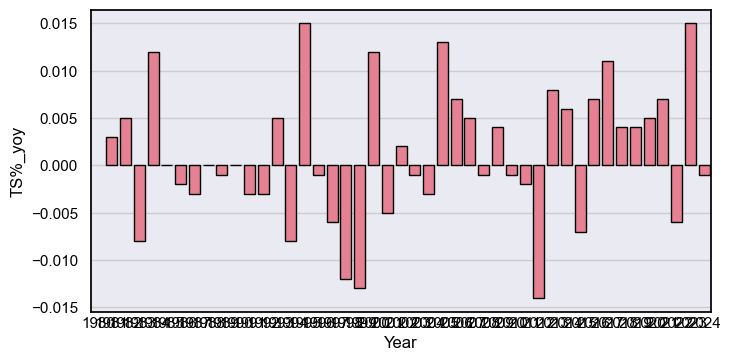

In [237]:
sns.barplot(avg,x='Year',y='TS%_yoy')
# plt.xticks(range(1980,2026,5))

# plt.yticks([i/10 for i in range(0,7,1)])